# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [67]:
#Dataset
c1 = 'Human machine interface for Lab ABC computer applications'
c2 = 'A survey of user opinion of computer system response time'
c3 = 'The EPS user interface management system'
c4 = 'System and human system engineering testing of EPS'
c5 = 'Relation of user-perceived response time to error measurement'
m1 = 'The generation of random, binary, unordered trees'
m2 = 'The intersection graph of paths in trees'
m3 = 'Graph minors IV: Widths of trees and well-quasi-ordering'
m4 = 'Graph minors: A survey'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

In [68]:
print(documents)

['Human machine interface for Lab ABC computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Relation of user-perceived response time to error measurement', 'The generation of random, binary, unordered trees', 'The intersection graph of paths in trees', 'Graph minors IV: Widths of trees and well-quasi-ordering', 'Graph minors: A survey']


### Perform preprocessing of documents

In the below cell remove punctuations and keep only words which belong to nltk corpus

In [69]:
# TASK CELL
import string
import nltk
from nltk.corpus import words

def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    # lower text
    preprocessed_message_list=message.lower()
    #if your single_word_in_document.lower() is in words.words , then convert to lower case
    # tokenize text and remove puncutation
    preprocessed_message_list = [word.strip(string.punctuation) for word in preprocessed_message_list.split(" ")]
    #preprocessed_message_list  = "".join([char for char in message if char not in string.punctuation])
    return preprocessed_message_list

### Verify preprocessed data

In [70]:
for sent in documents:
    print(preprocess(sent))

['human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'eps', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps']
['relation', 'of', 'user-perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'iv', 'widths', 'of', 'trees', 'and', 'well-quasi-ordering']
['graph', 'minors', 'a', 'survey']


##### Expected Output
```CPP
['human', 'machine', 'interface', 'for', 'lab', 'ABC', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'EPS', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS']
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering']
['graph', 'minors', 'a', 'survey']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [71]:
def createDocName(documents):
    docname = "c1 c2 c3 c4 c5 m1 m2 m3 m4"
    docname = docname.split()
    docment_dictionary = dict(zip(docname, documents))
    docname = [key for key in docment_dictionary]
    return docname
'''
Input:
documents: list of documents.
Output:
doc_names: a list of document names. 
'''


'\nInput:\ndocuments: list of documents.\nOutput:\ndoc_names: a list of document names. \n'

In [72]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [73]:
#populating the term matrix 
from collections import Counter
from nltk.corpus import stopwords
from typing import Dict, Generator, List, Tuple


def build_word_to_ix(documents,stopwords=None):
    word_to_ix= {}
    count_dict ={}
    index=0
    for doc in documents:
        for word in preprocess(doc):
            if word not in stopwords:
                if word not in count_dict.keys():
                    count_dict[word]=1
                else:
                    count_dict[word]+=1
    for word in count_dict.keys():
        if count_dict[word]>1:
            word_to_ix[word]=index
            index +=1
    return word_to_ix 
        

In [74]:
stopwords = nltk.corpus.stopwords.words('english')
word_to_ix = build_word_to_ix(documents,stopwords)
print(word_to_ix)

{'human': 0, 'interface': 1, 'computer': 2, 'survey': 3, 'user': 4, 'system': 5, 'response': 6, 'time': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


##### Expected Output
```CPP
{'human': 0, 'interface': 1, 'computer': 2, 'user': 3, 'survey': 4, 'system': 5, 'time': 6, 'response': 7, 'EPS': 8, 'trees': 9, 'graph': 10, 'minors': 11}
```

### Document-Terms count matrix

In [75]:
import numpy as np
def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    doc_num=0
    word_num=0
    td_matrix=np.zeros([len(word_to_ix.keys()),len(documents)])
    for doc in documents:
        for word in preprocess(doc):
                if word  in word_to_ix.keys():
                        td_matrix[word_to_ix[word]][doc_num] +=1
        doc_num +=1
    
    

    return td_matrix

In [76]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]


##### Expected Output
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [77]:
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    X = build_td_matrix(documents, word_to_ix)
    Uk =np.linalg.svd(X)[0][:,:2]
    Sk = np.diag(np.linalg.svd(X)[1])[:2,:2]
    Vk_t=np.transpose(np.linalg.svd(X)[2][:2,:])
    
    return Uk, Sk, Vk_t

In [78]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.24996905 -0.08382403]
 [-0.21198183 -0.05879672]
 [-0.24432508  0.04163819]
 [-0.20420593  0.26961464]
 [-0.32402635  0.01416911]
 [-0.69168389 -0.1221513 ]
 [-0.21924852  0.08307387]
 [-0.21924852  0.08307387]
 [-0.32967032 -0.1112931 ]
 [-0.01471931  0.50401961]
 [-0.03936203  0.63815168]
 [-0.0342975   0.46098478]]
[[3.26779047 0.        ]
 [0.         2.53906797]]
[[-0.21613257 -0.0397715 ]
 [-0.58227059  0.14549369]
 [-0.47657964 -0.10951735]
 [-0.6007139  -0.1730634 ]
 [-0.13418762  0.06543651]
 [-0.00450436  0.19850576]
 [-0.01654982  0.4498388 ]
 [-0.02704544  0.63139549]
 [-0.0850316   0.53907619]]


##### Expected Output
```CPP 
[[-0.22135078 -0.11317962]
 [-0.1976454  -0.07208778]
 [-0.24047023  0.04315195]
 [-0.40359886  0.05707026]
 [-0.20591786  0.27364743]
 [-0.64448115 -0.16730121]
 [-0.26503747  0.10715957]
 [-0.26503747  0.10715957]
 [-0.30082816 -0.14127047]
 [-0.01274618  0.49016179]
 [-0.03613585  0.62278523]
 [-0.03175633  0.45050892]]
[[3.34088375 0.        ]
 [0.         2.541701  ]]
[[-0.1973928  -0.05591352]
 [-0.60599027  0.16559288]
 [-0.46291751 -0.12731206]
 [-0.54211442 -0.23175523]
 [-0.27946911  0.10677472]
 [-0.00381521  0.19284794]
 [-0.01463147  0.43787488]
 [-0.02413684  0.6151219 ]
 [-0.08195737  0.52993707]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

coordinates of the documents are :
[[-0.70627596 -0.10098255]
 [-1.90273829  0.36941838]
 [-1.5573624  -0.278072  ]
 [-1.96300715 -0.43941972]
 [-0.43849703  0.16614774]
 [-0.01471931  0.50401961]
 [-0.05408134  1.14217129]
 [-0.08837884  1.60315606]
 [-0.27786546  1.36875109]]



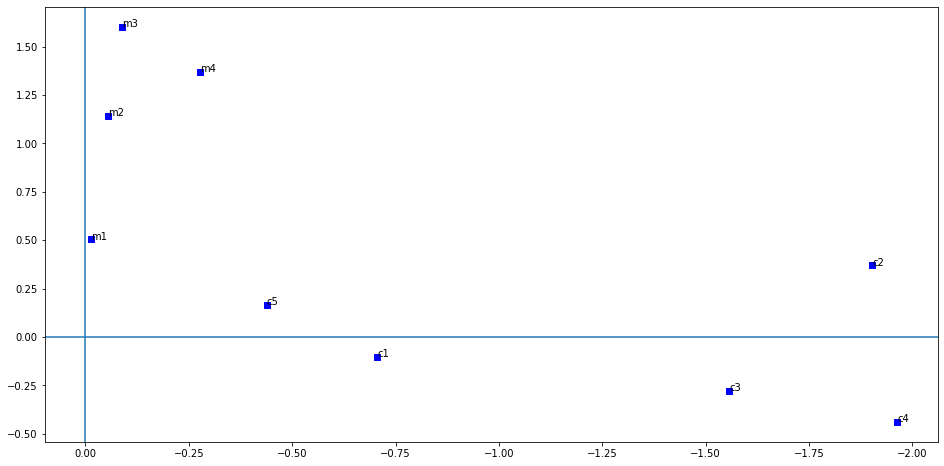

In [79]:
#Visualize documents and print coordinates
#Visualize terms and print coordinates
docName = createDocName(documents)
import matplotlib.pyplot as plt
import numpy as np
doc_cor=np.matmul(Vk_t,Sk)
print("coordinates of the documents are :")
print(doc_cor)
print()

fig,ax=plt.subplots(figsize=(16,8))

ax.axhline(0)
ax.axvline(0)
ax.invert_xaxis()

for i in range(len(doc_cor)):
    label_plot="Document" + str(i + 1)
    ax.scatter(doc_cor[i,0],doc_cor[i,1],label=label_plot,marker='s',c='blue')

for i,doc in enumerate(docName):
    ax.annotate(doc,(doc_cor[i][0],doc_cor[i][1]))
plt.show()

##### Expected
```CPP
[[-0.65946641 -0.14211544]
 [-2.02454304  0.42088758]
 [-1.54655358 -0.32358919]
 [-1.81114125 -0.5890525 ]
 [-0.9336738   0.2713894 ]
 [-0.01274618  0.49016179]
 [-0.04888203  1.11294703]
 [-0.08063836  1.56345595]
 [-0.27381004  1.34694158]]
```
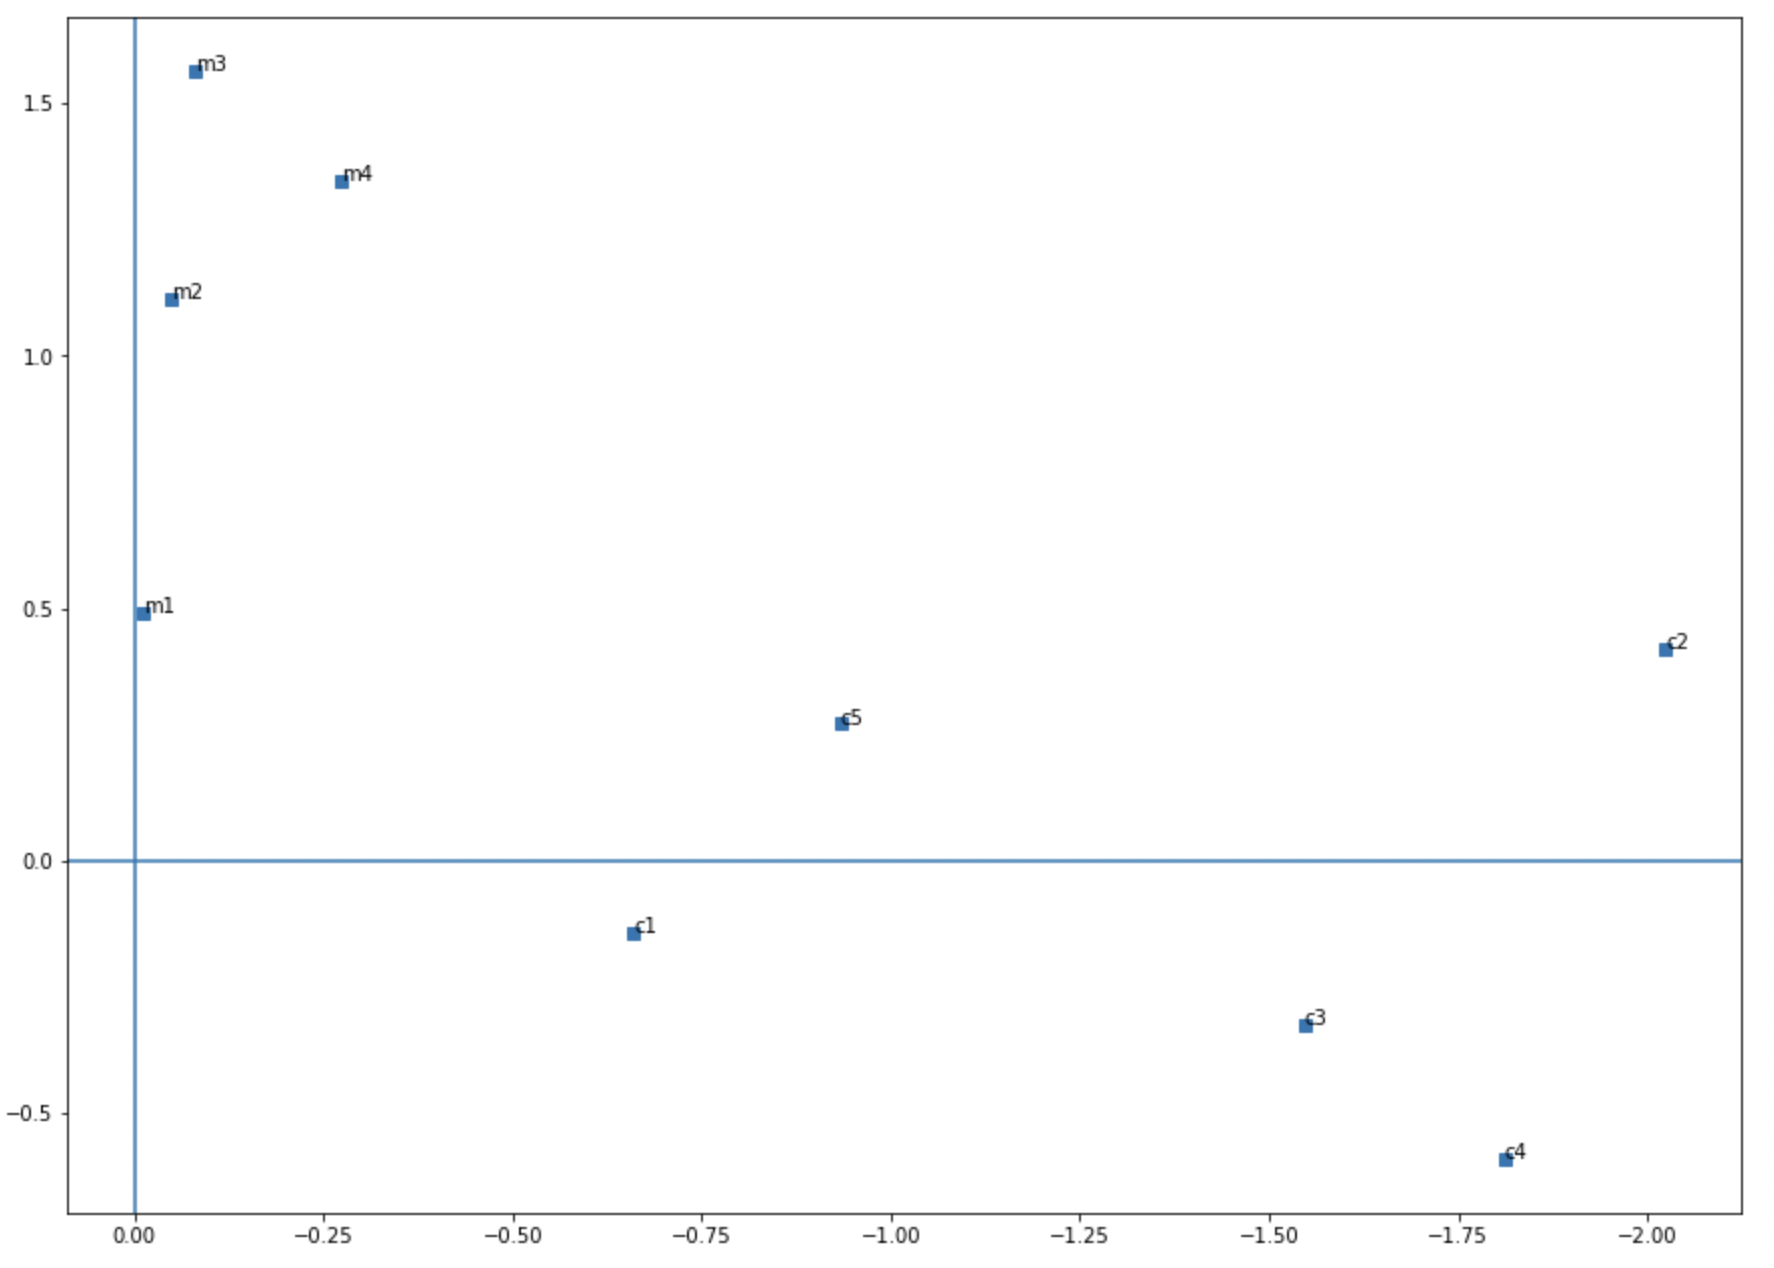

### Visualize terms in 2D space

coordinates of the terms are :
[[-0.81684647 -0.2128349 ]
 [-0.69271221 -0.14928886]
 [-0.79840316  0.10572219]
 [-0.66730219  0.68456989]
 [-1.05885023  0.03597634]
 [-2.26027802 -0.31015045]
 [-0.71645821  0.2109302 ]
 [-0.71645821  0.2109302 ]
 [-1.07729354 -0.28258075]
 [-0.04809962  1.27974005]
 [-0.12862686  1.62031048]
 [-0.11207705  1.17047168]]



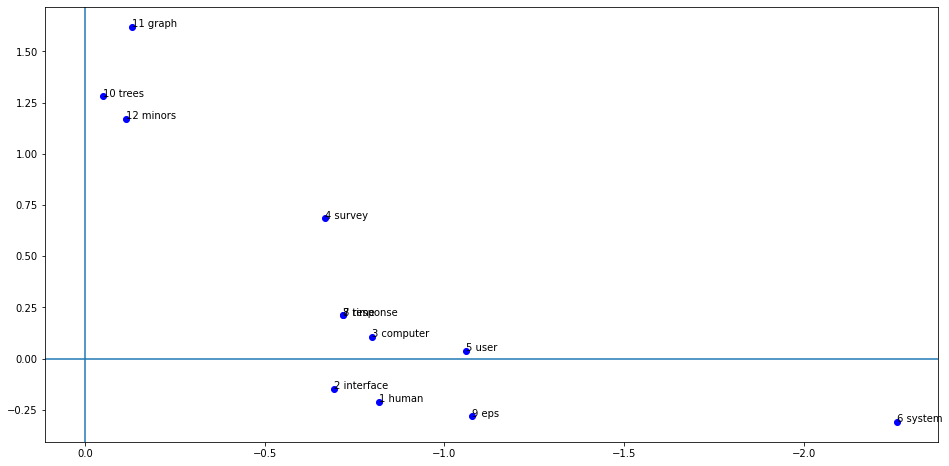

In [80]:
#Visualize terms and print coordinates
import matplotlib.pyplot as plt
term_cor=np.matmul(Uk,Sk)
print("coordinates of the terms are :")
print(term_cor)
print()

fig,ax=plt.subplots(figsize=(16,8))

ax.axhline(0)
ax.axvline(0)
ax.invert_xaxis()

for i in range(len(term_cor)):
    label_plot="Term" + str(i + 1)
    ax.scatter(term_cor[i,0],term_cor[i,1],label=label_plot,marker='o',c='blue')

for i, term in enumerate(word_to_ix.keys()):
    ax.annotate(str(i + 1)+' '+term,(term_cor[i][0],term_cor[i][1]))
plt.show()

##### Expected
```CPP
[[-0.73950722 -0.28766875]
 [-0.66031031 -0.18322558]
 [-0.80338307  0.10967936]
 [-1.34837689  0.14505553]
 [-0.68794764  0.69552995]
 [-2.15313661 -0.42522964]
 [-0.88545938  0.27236759]
 [-0.88545938  0.27236759]
 [-1.00503193 -0.35906729]
 [-0.04258352  1.24584472]
 [-0.12072567  1.58293385]
 [-0.1060942   1.14505897]]
```
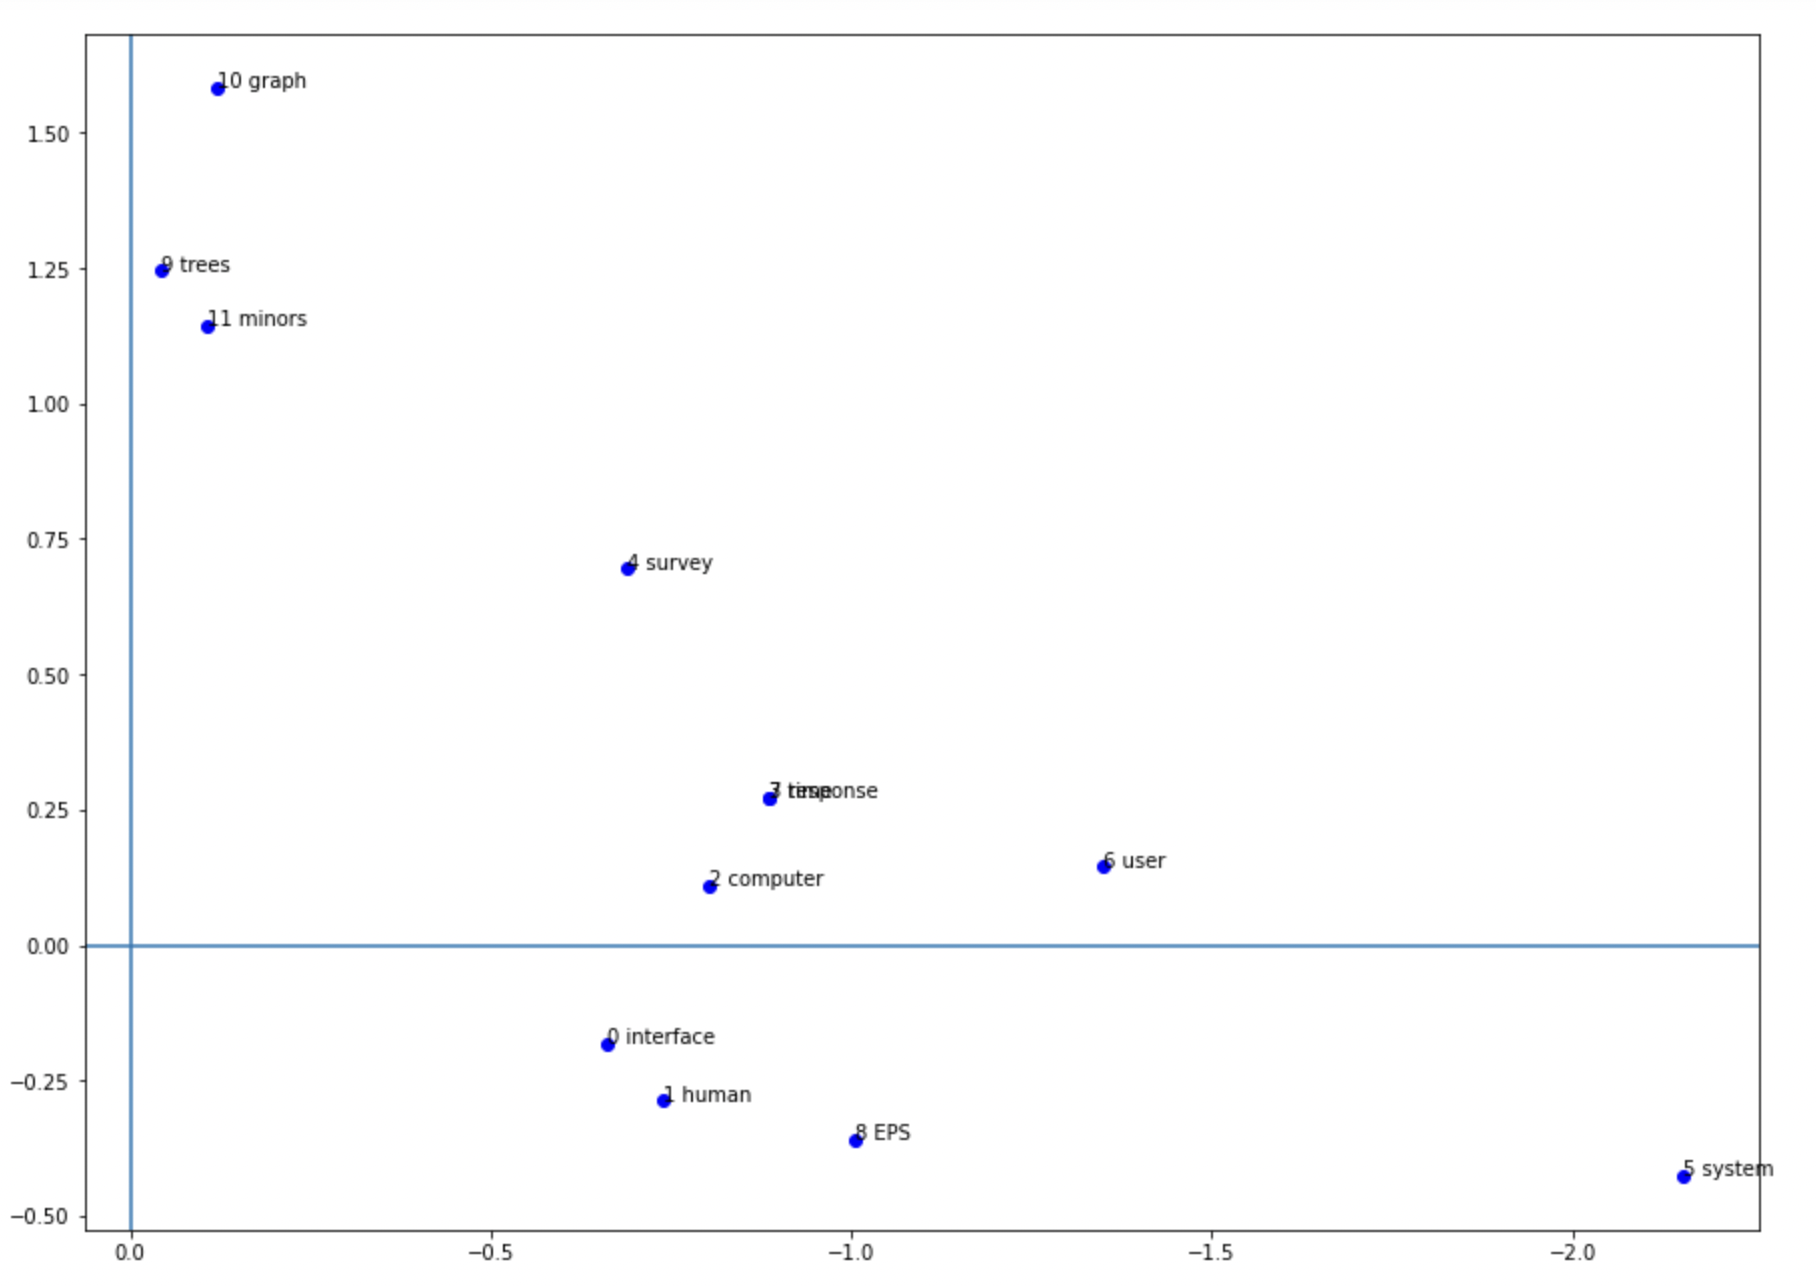

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [81]:
# Hint create query vector for input document. Calculate its cosine distance from other documents


def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score=0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    q_hat = np.matmul(Vk_t,Sk)
    matches=[]
    for c1 in range(len(q_hat)):
        for c2 in range(len(q_hat)):
            cosine_sim=np.dot(q_hat[c1],q_hat[c2])/(np.linalg.norm(q_hat[c1])* np.linalg.norm(q_hat[c2]))
            if cosine_sim >=0.9:
                matches.append((documents[c1],documents[c2],cosine_sim))
                
  
    return q_hat, matches

In [82]:
q_hat, matches = query('human computer interaction', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.70627596 -0.10098255]
 [-1.90273829  0.36941838]
 [-1.5573624  -0.278072  ]
 [-1.96300715 -0.43941972]
 [-0.43849703  0.16614774]
 [-0.01471931  0.50401961]
 [-0.05408134  1.14217129]
 [-0.08837884  1.60315606]
 [-0.27786546  1.36875109]]
[('Human machine interface for Lab ABC computer applications', 'Human machine interface for Lab ABC computer applications', 1.0000000000000002), ('Human machine interface for Lab ABC computer applications', 'A survey of user opinion of computer system response time', 0.9448102030881209), ('Human machine interface for Lab ABC computer applications', 'The EPS user interface management system', 0.9993988893425194), ('Human machine interface for Lab ABC computer applications', 'System and human system engineering testing of EPS', 0.9969436645766515), ('A survey of user opinion of computer system response time', 'Human machine interface for Lab ABC computer applications', 0.9448102030881209), ('A survey of user opinion of computer system response time

##### Expected
```CPP
[-0.461821   -0.07002767]
[('The EPS user interface management system', 0.9984452813340272), ('Human machine interface for Lab ABC computer applications', 0.9980930095689974), ('System and human system engineering testing of EPS', 0.9865886405556598), ('A survey of user opinion of computer system response time', 0.9374863669686595), ('Relation of user-perceived response time to error measurement', 0.9075594362644345)]
```

### Visual representation of query/document

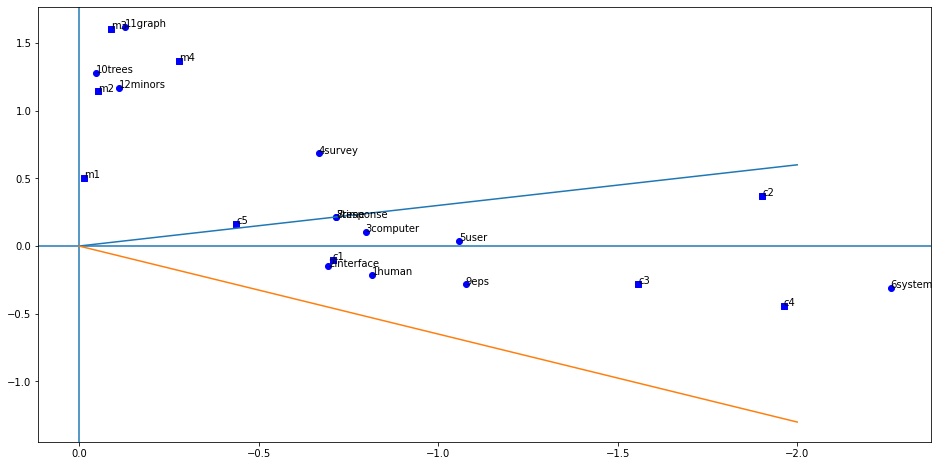

In [83]:
# Plot terms, documents and query documents along with lines representing its cosine angle 
fig,ax=plt.subplots(figsize=(16,8))
term_cor=np.matmul(Uk,Sk)
ax.axhline(0)
ax.axvline(0)
ax.invert_xaxis()
for i in range(len(q_hat)):
    label_plot="Document "+str(i+1)
    ax.scatter(q_hat[i,0],q_hat[i,1],label=label_plot,marker='s',c='blue')
for i,doc in enumerate(docName):
    ax.annotate(doc,(q_hat[i][0],q_hat[i][1]))
for i in range(len(term_cor)):
    label_plot="Term" + str(i+1)
    ax.scatter(term_cor[i,0],term_cor[i,1],label=label_plot,marker='o',c='blue')
for i,term in enumerate(word_to_ix.keys()):
    ax.annotate(str(i+1)+''+term,(term_cor[i][0],term_cor[i][1]))
#potting 
ax.plot([0,-2],[0,0.6])
ax.plot([0,-2],[0,-1.3])

plt.show()
    


##### Expected

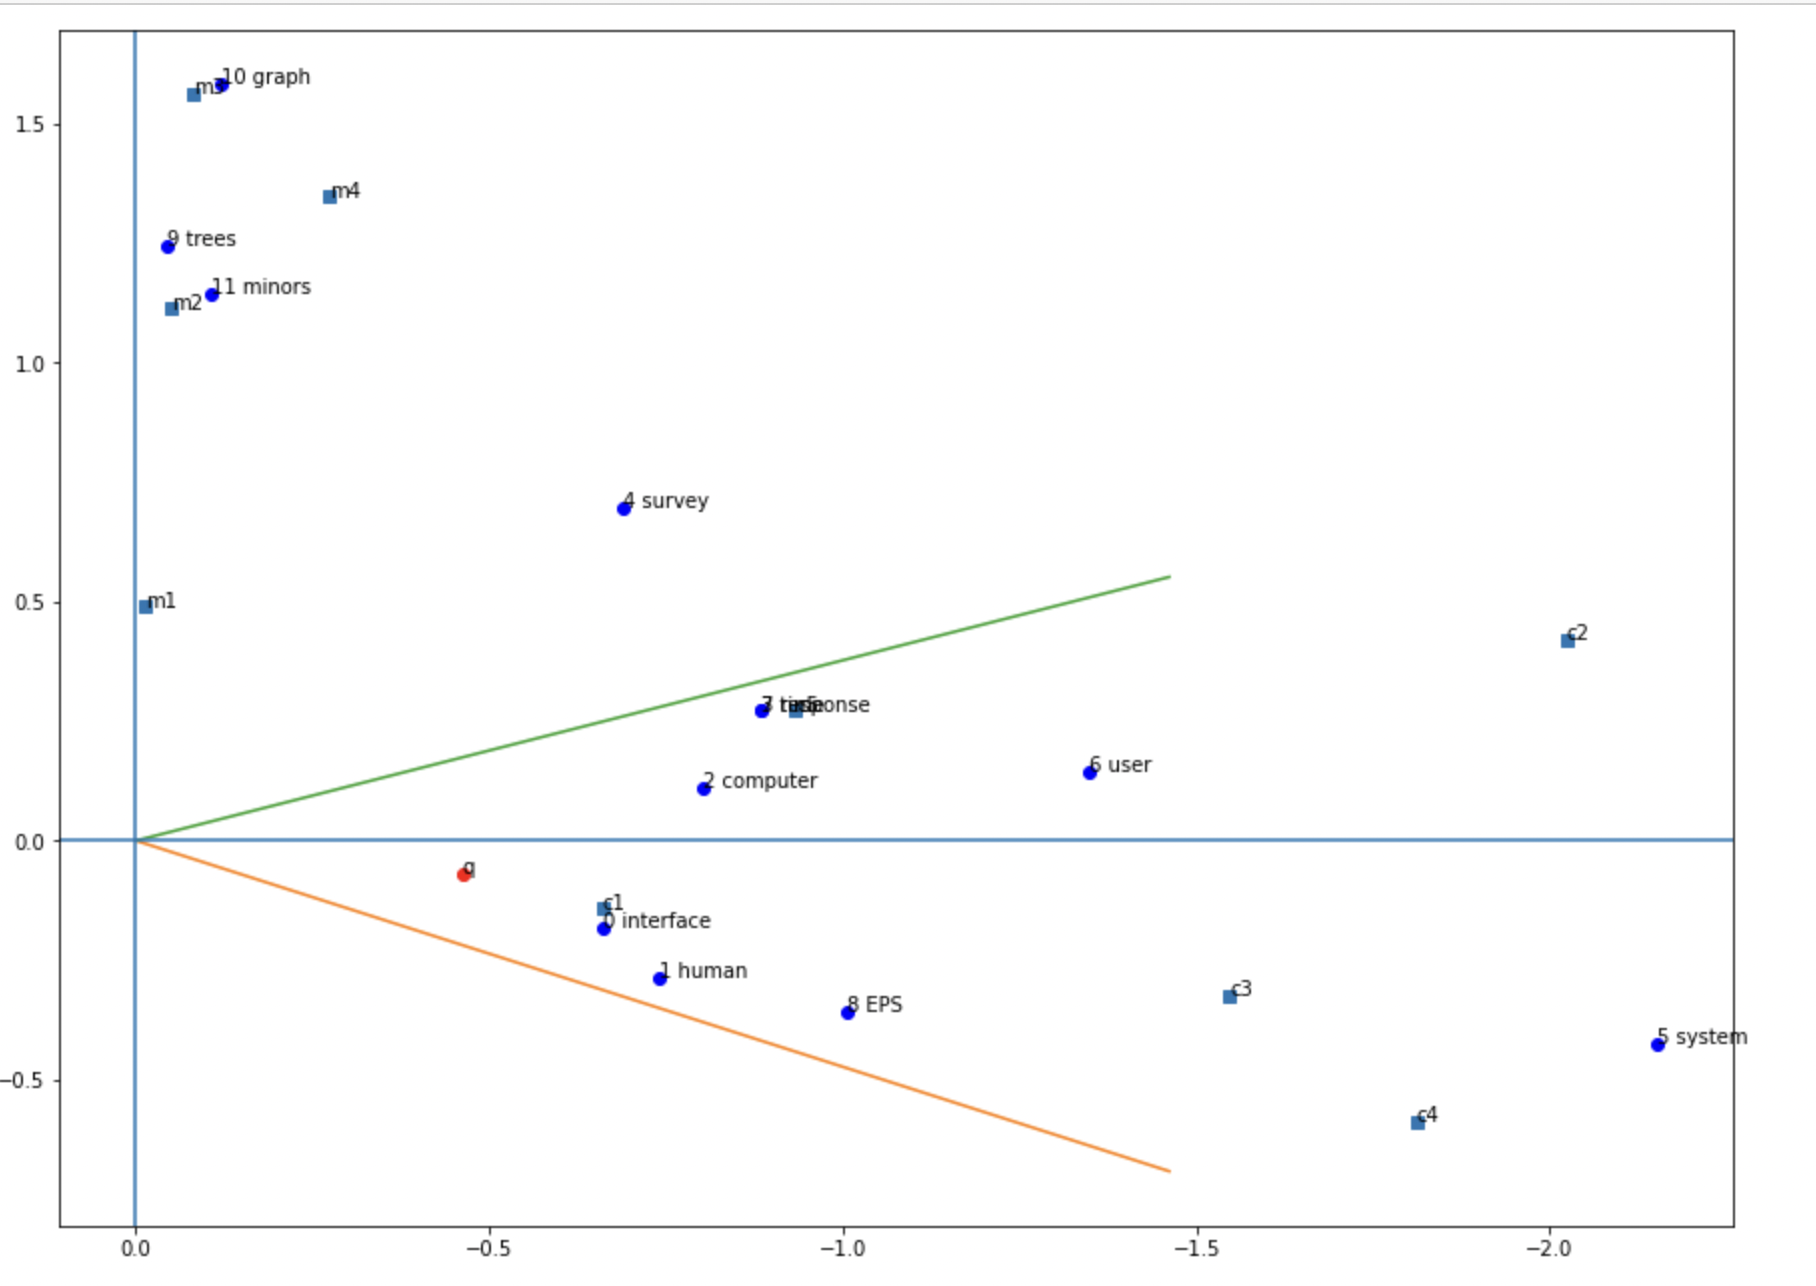


## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.

Answer : Here SVD is defined by the formula of : A=USV^T, where
U is an m x m matrix of Left Singular Vectors
S is an m x n rectangular diagonal matrix of Singular Values arranged in decreasing order
V is an n x n matrix of Right Singular Vectors

Hence the left-eigen vectors in document-term count matrix describes the horizontal columns , the right eigen vectors decribes the rows 
the eigen value matrix is n-by-n matrix A is thought of as mapping n-dimensional space onto itself where A = UΣV H, with diagonal Σ and orthogonal or unitary U and V .

Here in the example Uk is the U left singular matrix . Vk_t is the right singular matrix . The matrix the represents the product of it are the eigenvalue matrix of it . 

- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

Answer : refering to the above function when we replace the query sentence  human computer interaction with the  Graph and tree generation we do get the plot as shown below 

In [84]:
q_hat, matches = query('Graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.70627596 -0.10098255]
 [-1.90273829  0.36941838]
 [-1.5573624  -0.278072  ]
 [-1.96300715 -0.43941972]
 [-0.43849703  0.16614774]
 [-0.01471931  0.50401961]
 [-0.05408134  1.14217129]
 [-0.08837884  1.60315606]
 [-0.27786546  1.36875109]]
[('Human machine interface for Lab ABC computer applications', 'Human machine interface for Lab ABC computer applications', 1.0000000000000002), ('Human machine interface for Lab ABC computer applications', 'A survey of user opinion of computer system response time', 0.9448102030881209), ('Human machine interface for Lab ABC computer applications', 'The EPS user interface management system', 0.9993988893425194), ('Human machine interface for Lab ABC computer applications', 'System and human system engineering testing of EPS', 0.9969436645766515), ('A survey of user opinion of computer system response time', 'Human machine interface for Lab ABC computer applications', 0.9448102030881209), ('A survey of user opinion of computer system response time

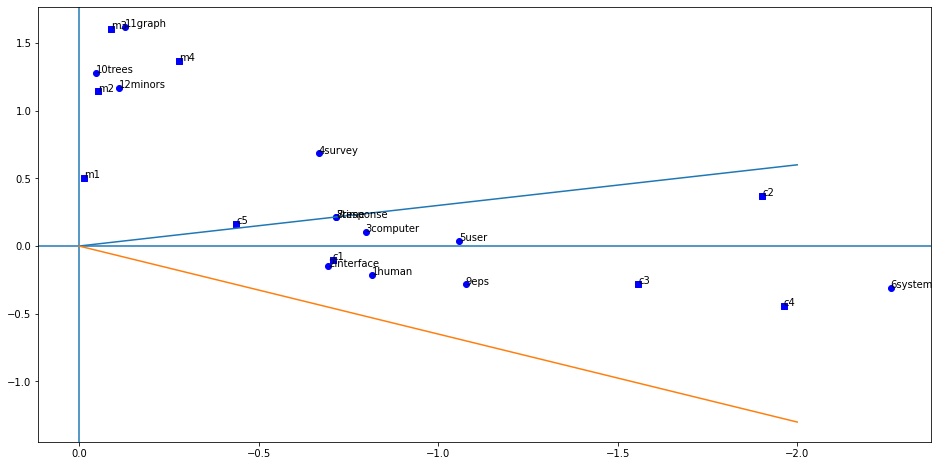

In [85]:
# Plot terms, documents and query documents along with lines representing its cosine angle 
fig,ax=plt.subplots(figsize=(16,8))
term_cor=np.matmul(Uk,Sk)
ax.axhline(0)
ax.axvline(0)
ax.invert_xaxis()
for i in range(len(q_hat)):
    label_plot="Document "+str(i+1)
    ax.scatter(q_hat[i,0],q_hat[i,1],label=label_plot,marker='s',c='blue')
for i,doc in enumerate(docName):
    ax.annotate(doc,(q_hat[i][0],q_hat[i][1]))
for i in range(len(term_cor)):
    label_plot="Term" + str(i+1)
    ax.scatter(term_cor[i,0],term_cor[i,1],label=label_plot,marker='o',c='blue')
for i,term in enumerate(word_to_ix.keys()):
    ax.annotate(str(i+1)+''+term,(term_cor[i][0],term_cor[i][1]))
#potting 
ax.plot([0,-2],[0,0.6])
ax.plot([0,-2],[0,-1.3])

plt.show()
    


# Q2. n-Gram Language Models

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [1]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np
import random
import itertools

In [2]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [3]:
"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = None
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = None
threshold = 1

In [4]:
# Performing Text Preprocessing 

# Importing all the Required Libraries 
import string 
punctuations = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""

def clean_text(text):
  for element in punctuations:
    text = text.replace(element, ' ')
  return text

print (string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Performing Tokenization 

def tokenize(text: str):
  cleaned_text = clean_text(text)
  tokens = cleaned_text.split()
  for token in tokens[:]: 
    if token == 's':
      tokens.remove(token)
  return tokens


### Implement training function (10 points)

In [57]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []
    n_grams_main_list = []

    # Marking the sentence begining and sentence ending
    tokens = (n-1)*[SENT_BEGIN] + tokens + (n-1)*[SENT_END]

    ## Your code here 
    for i in range(n-1, len(tokens)):

      # Setting the tuple size inside the list of tuples
      for j in reversed(range(n-1)):
        sub_n_gram_list = []
        sub_n_gram_list.append (tokens[i-j-1])

        # Converting into list and performing list concatenation
        sub_n_gram_list += [tokens[i]]
      n_grams_main_list.append(tuple(sub_n_gram_list))

      n_grams = []

      # Converting the first element of the tuple into tuple
      for token in n_grams_main_list:
        token = list(token)
        token[0] = tuple([token[0]])

        token = tuple(token)
        n_grams.append(token)

        """
        # Using intermediate Pyhton 
        n_grams = list(map(lambda x: tuple([tuple([x[0]]), x[1]]), n_grams_main_list))
        """

    return n_grams

In [58]:
# Test code for the fucntion make_n_grams 

corpus = "Akanksha Goes to the wonderful Northeastern University . She is scratching her head in assignment 3."
cleaned_corpus = clean_text(corpus)
tokens = tokenize(cleaned_corpus)
bi_grams = make_ngrams(tokens, 2)
bi_grams
#five_gram=make_ngrams(tokens, 5)

[(('<s>',), 'Akanksha'),
 (('Akanksha',), 'Goes'),
 (('Goes',), 'to'),
 (('to',), 'the'),
 (('the',), 'wonderful'),
 (('wonderful',), 'Northeastern'),
 (('Northeastern',), 'University'),
 (('University',), 'She'),
 (('She',), 'is'),
 (('is',), 'scratching'),
 (('scratching',), 'her'),
 (('her',), 'head'),
 (('head',), 'in'),
 (('in',), 'assignment'),
 (('assignment',), '3'),
 (('3',), '</s>')]

In [19]:
"""""def make_ngramss(tokens: list, n: int) -> list:
    n_grams=[]
    if n>3 :
        for i in range(n-1,len(tokens)):
            tmp_list=[]
            for j in reversed(range(n-1)):
                tmp_list.append(tokens[i-j-1])
            prev=tuple(tmp_list)
            n_grams.append((*prev,tokens[i]))
    return n_grams
""""""

In [20]:
""""corpus = "Akanksha Goes to the wonderful Northeastern University . She is scratching her head in assignment 3."
cleaned_corpus = clean_text(corpus)
tokens = tokenize(cleaned_corpus)
five_grams=make_ngramss(tokens, 5)
five_grams""""""

[('Akanksha', 'Goes', 'to', 'the', 'wonderful'),
 ('Goes', 'to', 'the', 'wonderful', 'Northeastern'),
 ('to', 'the', 'wonderful', 'Northeastern', 'University'),
 ('the', 'wonderful', 'Northeastern', 'University', 'She'),
 ('wonderful', 'Northeastern', 'University', 'She', 'is'),
 ('Northeastern', 'University', 'She', 'is', 'scratching'),
 ('University', 'She', 'is', 'scratching', 'her'),
 ('She', 'is', 'scratching', 'her', 'head'),
 ('is', 'scratching', 'her', 'head', 'in'),
 ('scratching', 'her', 'head', 'in', 'assignment'),
 ('her', 'head', 'in', 'assignment', '3')]

In [59]:
def word_count(tokens):
  count = {}
  for token in tokens:
    if token in count:
      count[token] += 1
    else:
      count[token] = 1
  return count 

In [60]:
corpus = 'Akanksha is a student at northeastern university and is studying machine learning and computer vision at college of engineering '

In [61]:
from typing import Counter
from collections import defaultdict


def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """

    # Opening file using python
    with open(training_file_path, 'r') as fh:
      content = fh.read() # Reads data
      tokens = tokenize(content)

    # Get the count of each word
    count = word_count(tokens)  
    print (f'count of each word is{count}')  

    # Replace the words with <UNK> if count is < threshold(=1)
    # Converting count dictionary to default dictionary
    # count = defaultdict(lambda: 0)

    smoothed_tokens = []
    for words in tokens:
      if count[words] > 1:
        words = words
        smoothed_tokens.append(words)
      else:
        word = 'UNK'
        smoothed_tokens.append(words)
   

    # make use of make_n_grams function
    n = 2
    n_grams = make_ngrams(tokens[:100], 2)
    # print (f'Bi-grams generated :{n_grams}')
    # print ('\n\n')

    n_gram_counts = {}
    n_minus_1_gram_counts ={}
    for ngram in n_grams:
      if ngram in n_gram_counts:
        n_gram_counts[ngram]  += 1
      else:
        n_gram_counts[ngram] = 1
      
      prev_words, target_words = ngram
      if prev_words in n_minus_1_gram_counts:
        n_minus_1_gram_counts[prev_words].append(target_words)
      else:
        n_minus_1_gram_counts[prev_words] = [target_words]
    # print (f'N_grams_counter :{n_gram_counts}')
    # print ('\n\n')
    # print (f'N_minus_1_grams_counter :{n_minus_1_gram_counts}')
    

    # Get the training data vocabulary
    vocab = list(set(tokens))
    
    # For n>1 grams compute n-1 gram counts to compute probability

    return n_gram_counts, vocab, n_minus_1_gram_counts, count

In [ ]:
#training function for n greater than n>3 for the task 2 
"""from typing import Counter
from collections import defaultdict


def train(training_file_path,n):
    Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    

    # Opening file using python
    with open(training_file_path, 'r') as fh:
      content = fh.read() # Reads data
      tokens = tokenize(content)

    # Get the count of each word
    count = word_count(tokens)  
    print (f'count of each word is{count}')  

    # Replace the words with <UNK> if count is < threshold(=1)
    # Converting count dictionary to default dictionary
    # count = defaultdict(lambda: 0)

    smoothed_tokens = []
    for words in tokens:
      if count[words] > 1:
        words = words
        smoothed_tokens.append(words)
      else:
        word = 'UNK'
        smoothed_tokens.append(words)
   

    # make use of make_n_grams function
    n_grams = make_ngrams(tokens[:100], n)
    

    n_gram_counts = {}
    n_minus_1_gram_counts ={}
    for ngram in n_grams:
      if ngram in n_gram_counts:
        n_gram_counts[ngram]  += 1
      else:
        n_gram_counts[ngram] = 1
      
      prev_words, target_words = ngram
      if prev_words in n_minus_1_gram_counts:
        n_minus_1_gram_counts[prev_words].append(target_words)
      else:
        n_minus_1_gram_counts[prev_words] = [target_words]
    

    # Get the training data vocabulary
    vocab = list(set(tokens))
    
    # For n>1 grams compute n-1 gram counts to compute probability

    return n_gram_counts, vocab, n_minus_1_gram_counts, count
"""



In [ ]:
""""n_gram_counts, vocab, n_minus_1_gram_counts, count = train('berp-training_bi.txt',5)
print (n_gram_counts)
print (vocab)
""""""

In [62]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

Output your Trained Data Parameters:

In [63]:
n_gram_counts, vocab, n_minus_1_gram_counts, count = train('berp-training_bi.txt')
print (n_gram_counts)
print (vocab)

count of each word is{'let': 242, 'start': 438, 'over': 414, 'my': 36, 'mother': 2, 'is': 359, 'coming': 3, 'to': 2153, 'visit': 3, 'and': 261, 'i': 3042, 'd': 510, 'like': 1221, 'take': 28, 'her': 1, 'dinner': 362, 'new': 5, 'query': 3, 'now': 49, 'm': 256, 'interested': 42, 'in': 313, 'some': 323, 'middle': 17, 'eastern': 15, 'food': 992, 'oh': 51, 'have': 594, 'breakfast': 127, 'increase': 2, 'the': 937, 'walking': 56, 'distance': 165, 'can': 382, 'go': 398, 'fifteen': 110, 'minutes': 226, 'from': 205, 'icsi': 156, 'would': 652, 'french': 87, 'okay': 152, 'back': 23, 'normal': 3, 'stuff': 3, 'what': 263, 'about': 967, 'mexican': 93, 'uh': 431, 'how': 172, 'american': 129, 'or': 129, 'european': 20, 'prefer': 16, 'german': 62, 'preferably': 5, 'less': 154, 'than': 311, 'ten': 271, 'dollars': 576, 'something': 78, 'fattening': 1, 'blocks': 43, 'icksee': 95, 'that': 201, 'too': 51, 'far': 72, 'away': 59, 'money': 68, 'doesn': 114, 't': 325, 'matter': 137, 'restaurant': 599, 'should': 1

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [64]:
import math

def score(sentence, n_gram_counts, count):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK> 
    smoothed_lst = []
    clean_sentence = clean_text(sentence)
    tokenized_sent = clean_sentence.split()
    for token in tokenized_sent:
      if token  in vocab:
        token = token
        smoothed_lst.append(token)
      else:
        token = 'UNK'
        smoothed_lst.append(token)
    
    print (smoothed_lst)

    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    # Creating n-grams for sentence
    # Initializing probability = 1
    probability = 1
    n_grams = make_ngrams(smoothed_lst, 2)
    for n_gram in n_grams:
      # print (f'n_gram in n_grams:{n_gram}')
      if n_gram in n_gram_counts:
        # print (n_gram)
        # print (n_gram_counts[n_gram])
        # print (n_gram[-1])
        # print (count[n_gram[-1]])
        i_prob = n_gram_counts[n_gram]/ count[n_gram[-1]]
        # print (f'prob:{i_prob}')
        probability = probability + math.log(i_prob)

    return probability

In [65]:
# Testing function 

sent = "<s> let's start over </s>"
result = score(sent, n_gram_counts, count)
result

['UNK', 'let', 'UNK', 'start', 'over', 'UNK']


-3.6395716127054234

In [66]:
print (n_minus_1_gram_counts)

{('<s>',): ['let'], ('let',): ['start'], ('start',): ['over', 'over', 'over', 'over'], ('over',): ['my', 'start', 'start', 'ten'], ('my',): ['mother'], ('mother',): ['is'], ('is',): ['coming'], ('coming',): ['to'], ('to',): ['visit', 'take', 'dinner', 'breakfast', 'have', 'the'], ('visit',): ['and'], ('and',): ['i'], ('i',): ['d', 'm', 'have', 'increase', 'can', 'would'], ('d',): ['like'], ('like',): ['to', 'to'], ('take',): ['her'], ('her',): ['to'], ('dinner',): ['new'], ('new',): ['query'], ('query',): ['now'], ('now',): ['i'], ('m',): ['interested'], ('interested',): ['in'], ('in',): ['some'], ('some',): ['middle'], ('middle',): ['eastern'], ('eastern',): ['food'], ('food',): ['oh', 'okay', 'prefer', 'preferably'], ('oh',): ['i', 'i', 'i'], ('have',): ['to', 'french'], ('breakfast',): ['oh'], ('increase',): ['the'], ('the',): ['walking', 'normal', '</s>'], ('walking',): ['distance'], ('distance',): ['i'], ('can',): ['go'], ('go',): ['fifteen'], ('fifteen',): ['minutes'], ('minutes'

In [58]:
from google.colab import files
uploaded = files.upload()

Saving hw2-test_bi.txt to hw2-test_bi.txt


In [67]:
#we are using bigram model to experiment this
with open("hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [68]:
# print probabilities/score of sentences in test content
for sentence in test_content:
  probablities.append(score(sentence, n_gram_counts, count))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)
print (mean)
print (std_dev)
#we are using bigram model to experiment this so the probabilty is printed in the end

['UNK', 'a', 'vegetarian', 'meal', 'UNK']
['UNK', 'about', 'ten', 'miles', 'UNK']
['UNK', 'and', 'i', 'm', 'willing', 'to', 'drive', 'ten', 'miles', 'UNK']
['UNK', 'and', 'this', 'will', 'be', 'for', 'dinner', 'UNK']
['UNK', 'are', 'any', 'of', 'these', 'restaurants', 'open', 'for', 'breakfast', 'UNK']
['UNK', 'are', 'there', 'russian', 'restaurants', 'in', 'berkeley', 'UNK']
['UNK', 'between', 'fifteen', 'and', 'twenty', 'dollars', 'UNK']
['UNK', 'can', 'you', 'at', 'least', 'list', 'the', 'UNK', 'of', 'these', 'restaurants', 'UNK']
['UNK', 'can', 'you', 'give', 'me', 'more', 'information', 'on', 'viva', 'taqueria', 'UNK']
['UNK', 'dining', 'UNK']
['UNK', 'display', 'sizzler', 'UNK']
['UNK', 'do', 'you', 'have', 'indonesian', 'food', 'UNK']
['UNK', 'do', 'you', 'know', 'any', 'pizza', 'places', 'UNK']
['UNK', 'doesn', 't', 'matter', 'UNK']
['UNK', 'eat', 'on', 'a', 'weekday', 'UNK']
['UNK', 'eight', 'dollars', 'UNK']
['UNK', 'expensive', 'UNK']
['UNK', 'five', 'miles', 'UNK']
['UNK', 

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [69]:
#we are using bigram model to experiment this
def generate_sentence(len_of_sentences:int, n_minus_1_gram_counts):
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    # Append sentence begin markers for n>2
    # Keep track of previous word for stop condition
    n=2
    sentence = []
    context_dict = n_minus_1_gram_counts
    print (len(context_dict))
    # context_dict = dict(itertools.islice(n_minus_1_gram_counts.items(), 2))

    if n > 1:

      # Getting prev_words from context created
      start_token = '<s>'
      cnt = 0
     
      for word in n_minus_1_gram_counts:  
        while (cnt < len_of_sentences):     
          if start_token in sentence:
            try:
              cnt += 1
              target_word = tuple([target_word])
              word_choice_list = context_dict[target_word]
              target_word = random.choice(word_choice_list)
              sentence.append(target_word)
            except:
              # sentence.append('<UNK>')
              pass

          else:
            context_tokens = (n-1)*['<s>']
            sentence = sentence + context_tokens

            word_choice_list = context_dict[word]
            target_word = random.choice(word_choice_list)
            sentence.append(target_word)

          # Construct the (n-1) gram so far  
          # Get the counts of all available choices based on n-1 gram
          # Convert the counts into probability for random.choice() function
          # If <s> is generated, ignore and generate another word
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      while prev_word != "</s>":
        pass
        # Convert the counts into probability for random.choice() function
        # If <s> is generated, ignore and generate another word

    # Append sentence end markers for n>2
    
    sentence[-1] = '</s>'
    print (len(sentence))
    return sentence

In [70]:
# Tesinting function 

generate_sentence(4, n_minus_1_gram_counts)

69
6


['<s>', 'let', 'start', 'over', 'ten', '</s>']

In [71]:
#we are using bigram model to experiment this
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    list_of_sentences = []
    for _ in range(n):
      sent = generate_sentence(4, n_minus_1_gram_counts)
      print (sent)
      list_of_sentences.append(sent)
    return sentences

In [64]:
#we are using bigram model to experiment this
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

69
6
['<s>', 'let', 'start', 'over', 'ten', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'my', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'ten', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'ten', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'ten', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'ten', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'my', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'my', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'my', '</s>']
69
6
['<s>', 'let', 'start', 'over', 'start', '</s

NameError: ignored

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [72]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    # test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]


    # Remove sentence begin markers from data for computing N
    # Get the probability for the sequence
    
    prob=score(test_sequence,n_gram_counts, count)
    test_sequence=test_sequence.replace("<s","")
    N=len(test_sequence.split(" "))
    perplexity=prob**(-1/N)

    
    return perplexity

In [73]:
print(perplexity(" ".join(sentence[0:10])))

['UNK', 'i', 'UNK', 'i', 'UNK', 'UNK']
1.0


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.

Answer: 
After experimenting the above model with the bigram , n>3 values such as 5 we can conclude that the higher is the better is the performance of the model . This is beacuse if we take the  example of the sentence saying that 

a student goes to the library everyday for his studies 

if we take n=2 the probability everything gets divided into the sets of 2 and further the model is trained in such as a way that it makes the prediction of the next word taking into the account of the two words only because its vocabulary is also stored in the similar way . When we take n=5 or so we increase the vocab size of it like while training the model its gets better understanding of what word wil come after the 5 words . The vocab also gets trained well . Hence the output is more close as compared to the bigrams . The higher order n-grams perform slightly better than the bigram in terms of junctures-correct and juncture-insertions.

Therefore n=7 will be best. N=5 performs better than unigram , bigram and trigrams . 




# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



In [3]:
from google.colab import files
uploaded = files.upload()

Saving movie_reviews.csv to movie_reviews.csv


### Visualizing data distribution (1 Point)


In [6]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [7]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
print(dataset.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Petter Mattei's "Love in the Time of Money" is...  positive
4  Probably my all-time favorite movie, a story o...  positive


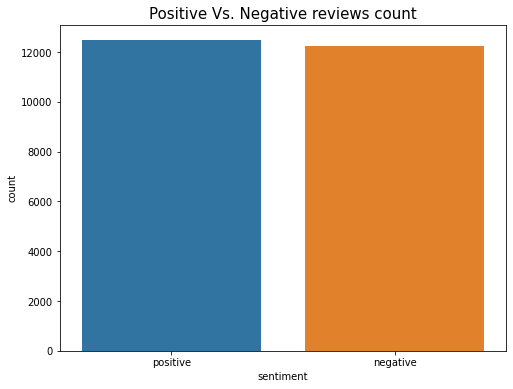

In [8]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################
plt.figure(figsize = [8, 6])
sns.countplot(x="sentiment", data = dataset)
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



### Cleaning the Reviews (2 Points)

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 
 # TASK CELL
cleaneddata=lambda x:clean_text(x)
dataset['review']=pd.DataFrame(dataset.review.apply(cleaneddata))

In [11]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
dataset['review'].head(10)


0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    petter matteis love time money visually stunni...
4    probably alltime favorite movie story selfless...
5    sure would like see resurrection dated seahunt...
6    like original gut wrenching laughter like movi...
7    fantastic movie three prisoner become famous o...
8    film simply remade one bad film fails capture ...
9    remember filmit first film watched cinema pict...
Name: review, dtype: object

### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [12]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################

from sklearn.model_selection  import train_test_split

# Splitting dataset into train and test samples
X = dataset['review']
y = dataset['sentiment']

# Splitting Train, Test samples into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
print (X_train, X_test, y_train, y_test)

178      doesnt happen often occasionally one man make ...
14500    many american peabrains worship support politi...
3867     movie almost get right good performance everyo...
18858    one cheap looking movie stripper keep getting ...
501      movie gripping start finish bw photography ame...
                               ...                        
3468     reviewer way waaaay farscape show temporarily ...
2661     cheap rubbish film nasa test rocket sent space...
3653     let see advantage watching piranha piranha wel...
1316     gilmore girl hilarious show never ending sarca...
7760     eye almost perfect example hollywood ego beate...
Name: review, Length: 19759, dtype: object 22735    said film definitely one better bargain bin mo...
10637    single sympathetic character entire movie lawy...
3221     despite perhaps part clever use music undersco...
15103    one worst movie ever watched story woman priso...
7745     offbeat slowpaced entertaining erotic thriller...
             

In [14]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################

from sklearn.preprocessing import LabelEncoder

# Creating an instance of Label Encoder 
label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

# Printing encoded Train labels 
print (y_train_enc)
print (np.unique(y_train_enc))

# Printing encided Test labels 
print (y_test_enc)
print (np.unique(y_test_enc))

[1 1 1 ... 0 1 0]
[0 1]
[1 0 0 ... 1 0 0]
[0 1]


### Pre-Processing The Text (5 Points)
 

In [15]:
from typing import Sequence
# You can use the modules given below
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################

# Creating an instance of tokenizer()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = tokenizer.word_index

vocabulary = [unique_words for unique_words in word_index]
vocab_size = len(vocabulary) + 1


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################

# Getting sequences of the train set
encoded_train_sequences = tokenizer.texts_to_sequences(X_train)
maxlen = max([len(sequence) for sequence in encoded_train_sequences])
encoded_test_sequences=tokenizer.texts_to_sequences(X_test)

#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

maxlen=200
# Getting padded X_train
X_train_padded = pad_sequences(encoded_train_sequences, maxlen = maxlen, padding = 'pre')
X_test_padded = pad_sequences(encoded_test_sequences, maxlen = maxlen, padding = 'pre')
# maxlen which is the maximum length of one review we will use for our training

print(f'Vocabulary : {vocabulary}')
print (f'Vocabulary : {len(vocabulary)}')

Vocabulary : ['br', 'movie', 'film', 'one', 'like', 'time', 'good', 'character', 'get', 'story', 'would', 'even', 'make', 'see', 'really', 'scene', 'well', 'much', 'people', 'also', 'great', 'bad', 'first', 'dont', 'show', 'way', 'thing', 'made', 'think', 'could', 'go', 'life', 'know', 'watch', 'many', 'love', 'seen', 'never', 'two', 'say', 'actor', 'plot', 'acting', 'look', 'little', 'year', 'best', 'end', 'take', 'ever', 'better', 'man', 'still', 'come', 'work', 'something', 'find', 'part', 'give', 'lot', 'want', 'im', 'real', 'director', 'back', 'watching', 'guy', 'performance', 'doesnt', 'woman', 'didnt', 'though', 'play', 'another', 'actually', 'funny', 'nothing', 'new', 'going', 'role', 'every', 'u', 'old', 'thats', 'feel', 'point', 'cant', 'girl', 'quite', 'day', 'world', 'cast', 'pretty', 'young', 'seems', 'horror', 'fact', 'around', 'comedy', 'minute', 'however', 'got', 'thought', 'right', 'action', 'big', 'without', 'enough', 'may', 'ive', 'friend', 'original', 'long', 'inter

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [17]:
# Creating glove dictionary (Pre-trained)
glove_dictionary = {}
with open('glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [16]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.200d.txt to glove.6B.200d.txt


In [18]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((vocab_size, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################

for word, index in word_index.items():

  # Getting word_embedding of word
  word_embedding = glove_dictionary.get(word)
  if word_embedding is not None:
    
    # Assigning word embedding to respective place in zero matrix created
    if len(word_embedding) != 200:
      word_embedding = np.concatenate([np.ones(200-len(word_embedding)),word_embedding])
      embedding_matrix[index] = word_embedding
  else:
    print (word)

Streaming output truncated to the last 5000 lines.
pucillo
aerialbr
wanabe
shittersbr
yourve
nonslutty
overgeneralizing
commentedbr
filmtv
powersinging
oldperennial
libe
giftos
larners
flavorsome
folksynfunky
kyuubi
prehysteria
arrgh
shaggingnudity
entertainerspoo
eatingarson
transexuality
fettish
abbasmustan
hearttouching
preitybr
halfoverwhelmed
cinquiã
libertybr
1escaping
2running
michaelbr
waityoull
entwines
acceleratebr
tainun
stepgreataunt
selfshaping
interiorlabyrinth
visualising
nearlunatic
persistance
weoponry
bewilderedbr
indiantraders
searchingbidding
scoresndtrk
somethinbg
sndtrkscore
bankloan
officebank
la99
discretionbr
alotyou
knowi
alotbr
tremblayjulian
ofttime
partnerbubbles
watchbuysteal
friendsit
aleisa
kimmellbr
kimmell
creditsâ
sigrist
standardsâ
colorfulbr
holeshow
noooooo
buteveryone
worls
worsel
exsistsbr
livinston
jcpenneys
hotelsritz
hiltonetc
kanesit
southmohanlal
madrasi
saystere
kaafi
bambaiya
abhisheh
mehboobababban
ghungroo
mausi
jayas
tambe
kaliganj
mrrg

In [19]:
embedding_matrix.shape

(100130, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [20]:
import tensorflow as tf

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = tf.keras.Sequential()

  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix
  # vocabulary size and dimension of embedding space given as input
  model.add(tf.keras.layers.Embedding(vocab_size, 200))


  # TO DO: layer 2 : add Bidirectional LSTM Layer 
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)))


  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
  model.add(tf.keras.layers.Dense(512, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.4))

  model.add(tf.keras.layers.Dense(8, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.4))


  # TO DO Final layer : add output layer and activation 
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
  model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
  
  return model

In [27]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
################################################################
model = build_model(embedding_matrix)
model.summary()
#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
#validation_data=(X_test_padded ,y_test_enc)
history = model.fit(X_train_padded, y_train_enc,batch_size = 74, epochs = 10, validation_data=(X_test_padded ,y_test_enc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 200)         20026000  
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              641600    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 512)               205312    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 4104      
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                      

### Plotting Accuracy and Losses (5 Points)
 




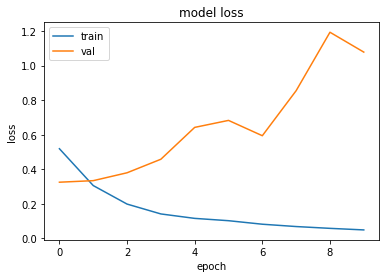

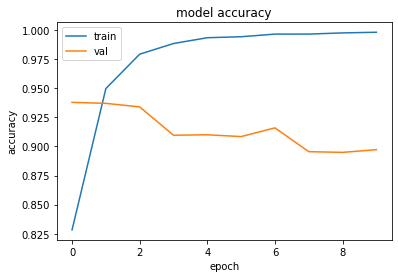

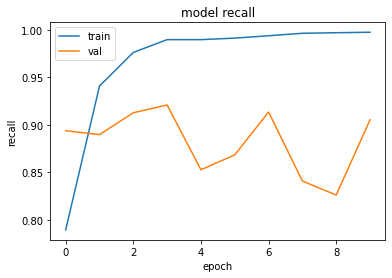

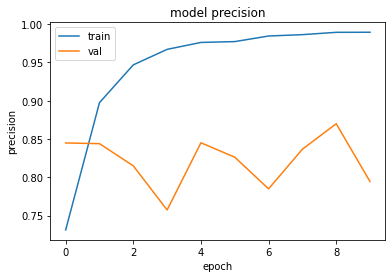

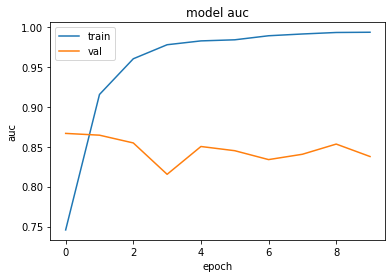

In [33]:


####################################
# PLOT :                           #
# 1 train loss vs val loss           #
# 2 train auc vs val auc             #
# 3 train recall vs val recall       #
# 4 train precision vs val precision #
# 5 train accuracy vs val accuracy   #
####################################
import matplotlib.pyplot as plt

# 1 summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 2 summarize history for accuracy
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 3 summarize history for accuracy
plt.plot(history.history['recall_3'])
plt.plot(history.history['val_recall_3'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4 summarize history for accuracy
plt.plot(history.history['precision_3'])
plt.plot(history.history['val_precision_3'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 5 summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [34]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 

pickle.dump(model,open('lstm_classifier.pkl','wb'))


INFO:tensorflow:Assets written to: ram://d5e73e85-a208-4d7d-a342-36fd91e7ec9e/assets


INFO:tensorflow:Assets written to: ram://d5e73e85-a208-4d7d-a342-36fd91e7ec9e/assets


### Prediction (5 Points)

In [35]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################

saved_model = pickle.load(open('lstm_classifier.pkl','rb'))

In [36]:
# use the saved model to predict the reviews
from typing import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#tf.keras.preprocessing.sequence.pad_sequences.
def predict_review(review):
  cleaned_review = clean_text(review)
  sequences=tokenizer.texts_to_sequences([cleaned_review])
  maxlen=200
  padded=pad_sequences(sequences,maxlen=maxlen)
  prediction = saved_model.predict(padded)
  if prediction >0.5:
    prediction =1
  else :
      prediction=0
  return prediction
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''

 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################
 



In [37]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0